In [2]:
# import packages
import scipy.io as sio
#import matlab.engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

In [2]:
# run matlab script to put data together
eng = matlab.engine.connect_matlab()
eng.cd(r'C:\Users\ishparii\dev\SkyFall_GLM', nargout=0)
eng.ls(nargout=0)

data_CF = eng.TrainingDataSetup([],[],10,0) #location -use all; subjID - use all; n jitter - 10; condition - healthy

In [3]:
data_CF_np = np.array(data_CF)
data_CF_df = pd.DataFrame(data_CF_np)

print(data_CF_df.shape)
data_CF_df.head()


(5626, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.136513,0.081746,-0.122824,0.025600,0.052075,0.047256,...,0.619927,-3.263991,0.970951,0.826820,0.056467,0.116454,0.096938,0.096879,0.085045,0.120810
1,1.0,1.0,1.0,3.0,0.041352,0.100302,-0.050781,-0.006526,0.038911,0.076903,...,0.975066,-1.236959,1.370951,0.755513,0.051981,0.100334,0.109475,0.101467,0.079220,0.041354
2,1.0,1.0,1.0,3.0,0.090994,0.077766,-0.106734,0.073996,0.043296,0.075605,...,1.995290,3.990091,1.370951,0.807967,0.053592,0.107039,0.118477,0.061844,0.063272,0.063075
3,1.0,1.0,1.0,4.0,-0.214547,0.021030,0.299949,-0.035794,0.034026,0.064057,...,2.154851,4.679889,1.370951,0.642327,0.037378,0.054755,0.089087,0.060346,0.092151,0.057784
4,1.0,1.0,1.0,4.0,-0.199259,0.071741,0.244227,-0.047195,0.014596,0.050118,...,2.010980,4.059827,1.370951,0.567154,0.043382,0.095849,0.125517,0.091936,0.060729,0.025293


In [4]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_CF_df=data_CF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_CF_df.to_csv('data_CF.csv')

data_CF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.136513,0.081746,-0.122824,0.025600,0.052075,0.047256,...,0.619927,-3.263991,0.970951,0.826820,0.056467,0.116454,0.096938,0.096879,0.085045,0.120810
1,1.0,1.0,1.0,3.0,0.041352,0.100302,-0.050781,-0.006526,0.038911,0.076903,...,0.975066,-1.236959,1.370951,0.755513,0.051981,0.100334,0.109475,0.101467,0.079220,0.041354
2,1.0,1.0,1.0,3.0,0.090994,0.077766,-0.106734,0.073996,0.043296,0.075605,...,1.995290,3.990091,1.370951,0.807967,0.053592,0.107039,0.118477,0.061844,0.063272,0.063075
3,1.0,1.0,1.0,4.0,-0.214547,0.021030,0.299949,-0.035794,0.034026,0.064057,...,2.154851,4.679889,1.370951,0.642327,0.037378,0.054755,0.089087,0.060346,0.092151,0.057784
4,1.0,1.0,1.0,4.0,-0.199259,0.071741,0.244227,-0.047195,0.014596,0.050118,...,2.010980,4.059827,1.370951,0.567154,0.043382,0.095849,0.125517,0.091936,0.060729,0.025293


In [5]:
data_AF = eng.TrainingDataSetup([],[],10,1) #location -use all; subjID - use all; n jitter - 10; condition - amputees
# data_AF

In [6]:
data_AF_np = np.array(data_AF)
data_AF_df = pd.DataFrame(data_AF_np)

print(data_AF_df.shape)
data_AF_df.head()

(3521, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.282872,-0.455941,-0.120541,-0.019832,-0.184655,-0.035470,...,1.910994,3.684445,1.921928,0.133988,0.397865,0.132353,1.653021,1.863394,0.203655,0.179003
1,3.0,1.0,0.0,3.0,-0.382799,-0.552919,-0.175534,-0.016492,-0.162472,-0.036037,...,2.070674,4.323376,1.370951,0.762029,0.042164,0.069791,0.083462,0.059193,0.097964,0.060724
2,3.0,1.0,0.0,3.0,-0.448883,-0.504188,-0.091728,-0.013547,-0.167976,-0.040580,...,1.202266,0.014931,1.370951,-0.049686,0.510695,0.181878,2.526639,2.389197,0.130304,0.161898
3,3.0,1.0,0.0,4.0,0.593941,0.215652,-0.179093,-0.009426,0.141375,-0.054097,...,2.025223,4.123290,1.370951,0.821978,0.095103,0.164089,0.201405,0.186642,0.143226,0.190399
4,3.0,1.0,0.0,4.0,0.416048,0.042082,-0.178169,-0.008228,-0.141803,-0.051110,...,2.235629,4.998417,0.721928,0.757081,0.067064,0.124089,0.085467,0.058545,0.101145,0.076658


In [7]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_AF_df=data_AF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_AF_df.to_csv('data_AF.csv')

data_AF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.282872,-0.455941,-0.120541,-0.019832,-0.184655,-0.035470,...,1.910994,3.684445,1.921928,0.133988,0.397865,0.132353,1.653021,1.863394,0.203655,0.179003
1,3.0,1.0,0.0,3.0,-0.382799,-0.552919,-0.175534,-0.016492,-0.162472,-0.036037,...,2.070674,4.323376,1.370951,0.762029,0.042164,0.069791,0.083462,0.059193,0.097964,0.060724
2,3.0,1.0,0.0,3.0,-0.448883,-0.504188,-0.091728,-0.013547,-0.167976,-0.040580,...,1.202266,0.014931,1.370951,-0.049686,0.510695,0.181878,2.526639,2.389197,0.130304,0.161898
3,3.0,1.0,0.0,4.0,0.593941,0.215652,-0.179093,-0.009426,0.141375,-0.054097,...,2.025223,4.123290,1.370951,0.821978,0.095103,0.164089,0.201405,0.186642,0.143226,0.190399
4,3.0,1.0,0.0,4.0,0.416048,0.042082,-0.178169,-0.008228,-0.141803,-0.051110,...,2.235629,4.998417,0.721928,0.757081,0.067064,0.124089,0.085467,0.058545,0.101145,0.076658


In [3]:
# read data from csv files
data_CF_df = pd.read_csv('data_CF.csv', index_col=0)
data_CF_df.head()

data_AF_df = pd.read_csv('data_AF.csv', index_col=0)
data_AF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.316842,-0.513288,-0.181439,-0.012925,-0.175567,-0.046057,...,2.123134,4.547600,1.370951,-0.224154,0.387849,0.115181,0.139960,0.174659,1.697068,0.898328
1,3.0,1.0,0.0,3.0,-0.455659,-0.570001,-0.196702,-0.015782,-0.160631,-0.045846,...,1.235934,0.195153,1.370951,0.650340,0.036201,0.086189,0.035767,0.032562,0.066306,0.096367
2,3.0,1.0,0.0,3.0,-0.507856,-0.505835,-0.101515,-0.011607,-0.157200,-0.039848,...,1.479414,1.480125,1.370951,0.314882,0.519301,0.181734,0.187125,0.144392,0.205148,0.098102
3,3.0,1.0,0.0,4.0,0.590558,0.190188,-0.231575,-0.013486,-0.147350,-0.051602,...,2.016604,4.085064,1.370951,0.258867,0.061490,0.056101,0.077975,0.109353,0.147960,0.176257
4,3.0,1.0,0.0,4.0,0.417043,0.047122,-0.179731,-0.011171,-0.153019,-0.044708,...,1.588522,2.037410,1.370951,0.714722,0.062383,0.068096,0.053171,0.081353,0.036358,0.216369


In [4]:
# changing labels: 1 - fall; 9 - non-fall 
data_CF_df.loc[(data_CF_df.label == 4) | (data_CF_df.label == 3) | (data_CF_df.label == 2), ['label']] = 1
data_AF_df.loc[(data_AF_df.label == 4) | (data_AF_df.label == 3) | (data_AF_df.label == 2), ['label']] = 1

# change amputee subjects ids
max_id_CF = data_CF_df.subj_id.max()
print(max_id_CF)
data_AF_df.subj_id = data_AF_df.subj_id + max_id_CF
print("Amputee subjects id: ", data_AF_df.subj_id.unique())
print()
print("Unique labels: ", data_AF_df.label.unique())

10.0
Amputee subjects id:  [ 13.  14.  15.  12.  16.  17.  11.]

Unique labels:  [ 1.  9.]


In [40]:
# training and testing data split

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_train = data_CF_df.loc[data_CF_df['location'] == 2] # pocket data
data_test = data_AF_df.loc[data_AF_df['location'] == 2]

#data_train = data_CF_df[(data_CF_df.location == 1) & ((data_CF_df.label>0) & (data_CF_df.label<=4))]
#data_test = data_AF_df[(data_AF_df.location == 1) & ((data_AF_df.label>0) & (data_AF_df.label<=4))]

print(data_train.shape)
print(data_test.shape)

(1653, 1215)
(837, 1215)


In [5]:
# mix data
import random
from sklearn.utils import shuffle

data = data_CF_df
full_data = data.append(data_AF_df)

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
# full_data = full_data[((full_data.location == 1) 
# #                        | (full_data.location == 3)
#                       )] # data for pouch + hand
print("Data size: ", full_data.shape)
print()

subj_ids = np.sort(np.array(full_data.subj_id.unique()))
print("All subjects ids: ",subj_ids)

# first and last 2 subjects ids for testing
test_subjects = subj_ids[np.r_[0:2, -2:0]]
print("Subjects for testing: ",test_subjects)

train_subjects = np.setdiff1d(subj_ids,test_subjects)
print("Subjects for training: ",train_subjects)

data_train = full_data.loc[full_data['subj_id'].isin(train_subjects)]
data_test = full_data.loc[full_data['subj_id'].isin(test_subjects)]
# group data by subject
#groups = full_data.groupby('subj_id')
#groups.head()

#random.shuffle(groups)

#for g, grp in groups:
#    print (grp)

#data = pd.DataFrame(groups)
#print(data.shape)
#data.head()

#data_train, data_test = train_test_split(data, test_size=0.3)
print("Training data size: ", data_train.shape)
print("Testing data size: ",data_test.shape)

Data size:  (5869, 1215)

All subjects ids:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.]
Subjects for testing:  [  1.   2.  16.  17.]
Subjects for training:  [  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.]
Training data size:  (4651, 1215)
Testing data size:  (1218, 1215)


In [6]:
print("Unique labels in training set: ", data_train.label.unique())
print()
print("Unique labels in testing set: ", data_test.label.unique())

Unique labels in training set:  [ 1.  9.]

Unique labels in testing set:  [ 1.  9.]


In [7]:
# list of features
features = list(range(4,1215))
features = np.array(features)

In [8]:
# handpicking features

# feature groups:
#       1 - Raw Signal Statistics
#       2 - Raw Signal Correlation Coefficients
#       3 - Raw Signal 5s FFT bins
#       4 - Raw Signal 1s FFT bins
#		5 - Derivative Statistics
#		6 - Derivative 5s FFT bins
#		7 - Derivative 1s FFT bins
#		8 - Resultant Vector and Magnitude 
#		9 - Angle Statistics (ArcTan)
#		10 - Entropies
#		11 - Raw Signal Cross Products
#		12 - Derivative Cross Products
#		13 - Raw Signal Statistics on 1s FFT bins
#		14 - Raw Signal Entropies on 1s FFT bins
#		15 - Raw Signal Statistics on 1s binned signal energy
#		16 - Derivative Statistics on 1s FFT bins
#		17 - Derivative Entropies on 1s FFT bins
#		18 - Barometer

features_to_use = eng.getFeatureInds(matlab.logical([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]))

features_to_use = np.array(features_to_use)
features_to_use = [y for x in features_to_use for y in x] # flatten array
features_to_use = np.array(features_to_use)

features = features[features_to_use]
print(features)
print(len(features))

NameError: name 'eng' is not defined

Feature ranking:
1. feature 388 (0.017369)
2. feature 988 (0.013747)
3. feature 387 (0.012462)
4. feature 990 (0.012415)
5. feature 989 (0.012387)
6. feature 386 (0.010704)
7. feature 965 (0.010123)
8. feature 964 (0.009844)
9. feature 956 (0.009411)
10. feature 1071 (0.008783)
11. feature 1145 (0.008781)
12. feature 609 (0.008537)
13. feature 1144 (0.008261)
14. feature 945 (0.008241)
15. feature 786 (0.008004)
16. feature 1045 (0.007992)
17. feature 955 (0.007965)
18. feature 1070 (0.007855)
19. feature 1146 (0.007677)
20. feature 1191 (0.007425)
21. feature 968 (0.007250)
22. feature 967 (0.007141)
23. feature 1044 (0.007064)
24. feature 492 (0.007010)
25. feature 957 (0.006956)
26. feature 1201 (0.006621)
27. feature 1121 (0.006528)
28. feature 966 (0.006447)
29. feature 1120 (0.006308)
30. feature 970 (0.006304)
31. feature 1095 (0.006188)
32. feature 599 (0.006080)
33. feature 183 (0.005960)
34. feature 610 (0.005795)
35. feature 1010 (0.005712)
36. feature 1196 (0.005649)
37. fe

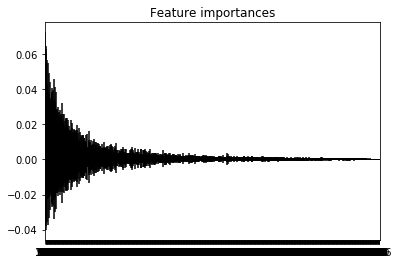

In [9]:
# features analysis
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = data_train[features]
Y = data_train['label']

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

1. feature 388 (1.000000)
2. feature 988 (0.791479)
3. feature 387 (0.717514)
4. feature 990 (0.714784)
5. feature 989 (0.713188)
6. feature 386 (0.616282)
7. feature 965 (0.582826)
8. feature 964 (0.566754)
9. feature 956 (0.541838)
10. feature 1071 (0.505706)
11. feature 1145 (0.505568)
12. feature 609 (0.491526)
13. feature 1144 (0.475606)
14. feature 945 (0.474453)
15. feature 786 (0.460840)
16. feature 1045 (0.460121)
17. feature 955 (0.458588)
18. feature 1070 (0.452250)
19. feature 1146 (0.442031)
20. feature 1191 (0.427480)
21. feature 968 (0.417390)
22. feature 967 (0.411129)
23. feature 1044 (0.406722)
24. feature 492 (0.403585)
25. feature 957 (0.400494)
26. feature 1201 (0.381197)
27. feature 1121 (0.375837)
28. feature 966 (0.371189)
29. feature 1120 (0.363197)
30. feature 970 (0.362936)
31. feature 1095 (0.356296)
32. feature 599 (0.350073)
33. feature 183 (0.343143)
34. feature 610 (0.333633)
35. feature 1010 (0.328843)
36. feature 1196 (0.325261)
37. feature 517 (0.3220

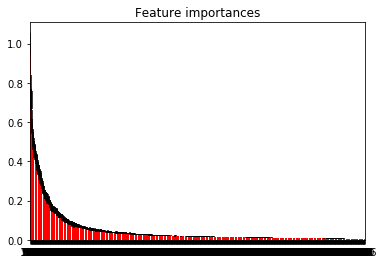

In [10]:
# normalize feature importances

importances = np.array(importances)
importances /= importances.max()

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [11]:
# select features > 10 % importance
features = [i for i,j in zip(features,importances) if j > 0.1]

print ("Selected number of features: %d" % len(features))

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Selected number of features: 128
1. feature 388 (1.000000)
2. feature 988 (0.791479)
3. feature 387 (0.717514)
4. feature 990 (0.714784)
5. feature 989 (0.713188)
6. feature 386 (0.616282)
7. feature 965 (0.582826)
8. feature 964 (0.566754)
9. feature 956 (0.541838)
10. feature 1071 (0.505706)
11. feature 1145 (0.505568)
12. feature 609 (0.491526)
13. feature 1144 (0.475606)
14. feature 945 (0.474453)
15. feature 786 (0.460840)
16. feature 1045 (0.460121)
17. feature 955 (0.458588)
18. feature 1070 (0.452250)
19. feature 1146 (0.442031)
20. feature 1191 (0.427480)
21. feature 968 (0.417390)
22. feature 967 (0.411129)
23. feature 1044 (0.406722)
24. feature 492 (0.403585)
25. feature 957 (0.400494)
26. feature 1201 (0.381197)
27. feature 1121 (0.375837)
28. feature 966 (0.371189)
29. feature 1120 (0.363197)
30. feature 970 (0.362936)
31. feature 1095 (0.356296)
32. feature 599 (0.350073)
33. feature 183 (0.343143)
34. feature 610 (0.333633)
35. feature 1010 (0.328843)
36. feature 1196 (

In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
# setting data for training
X = data_train[features] # data for training
Y = data_train['label'] # target labels
groups = data_train['subj_id']

In [24]:
# Different models to try
#       Model name ---------------------------------------------------------------------
#      Parameters ------------------------------------------                           |
#     Classifier -----------                               |                           |
#                          |                               |                           |
#                          v                               v                           |
models = [#[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
#                                            'min_samples_leaf': [1, 5, 10, 15, 20],#     v
#                                            'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
          ]

# models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

# models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

# LinearSVC
models.append([svm.SVC(kernel='rbf', class_weight={1:10,9:1}), {#'kernel': ['rbf'], # class_weight="balanced"; tol
                           'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                           'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])

# models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])



# models.append([ RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200],
# #                                           'max_depth': [1, 10, 20, 30, 40, 50],
# #                                           'min_samples_leaf': [1, 5, 10, 15, 20],
# #                                           'min_samples_split': [2, 4, 6, 8, 10]
#                                           }, "Random Forest"])

models_with_best_params = []

# cross-validation strategy
# cv = 10 # for 10-folds cross-validation

# Leave One Group Out
logo = LeaveOneGroupOut()
cv = logo.get_n_splits(X,Y,groups)


for model in models:
    clf = GridSearchCV(model[0], model[1], cv=cv)
    clf.fit(X, Y)
    best_params = clf.best_params_
    best_estimator = clf.best_estimator_
    
    model_with_best_params = [best_estimator, best_params, model[2]]
    
    models_with_best_params.append(model_with_best_params)
    
    print(model[2], ": ")
    print("Best score for ", model[2], ":", clf.best_score_)
    print()
    print("Best parameters for ", model[2], " found on development set:", best_params)
    print()
    print("Best estimator for ", model[2], " model:", best_estimator)
    print()
    print()

    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

# print(models_with_best_params)


SVM rbf : 
Best score for  SVM rbf : 0.8974414104493658

Best parameters for  SVM rbf  found on development set: {'C': 10000.0, 'gamma': 10000.0}

Best estimator for  SVM rbf  model: SVC(C=10000.0, cache_size=200, class_weight={1: 10, 9: 1}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10000.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Grid scores on development set:

0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 10000.0}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 1000.0}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 100.0}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 10.0}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 1}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 0.1}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 0.01}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 0.001}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 0.0001}
0.897 (+/-0.002) for {'C': 10000.0, 'gamma': 1e-05}
0.897 (+/-0.002) for {'C': 1

In [25]:
#fitting models to test_data
for model in models_with_best_params:
    classifier = model[0]
    classifier.fit(X, Y)
    score = classifier.score(data_test[features], data_test['label'])
    print("Prediction accuracy for", model[2], "model is", score)
    expected = data_test['label']
    predicted = classifier.predict(data_test[features])

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Prediction accuracy for SVM rbf model is 0.880952380952
Classification report for classifier SVC(C=10000.0, cache_size=200, class_weight={1: 10, 9: 1}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10000.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        1.0    0.88095   1.00000   0.93671      1073
        9.0    0.00000   0.00000   0.00000       145

avg / total    0.77608   0.88095   0.82520      1218


Confusion matrix:
[[1073    0]
 [ 145    0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
# count falls and non-falls in test set
labels_np = np.array(expected)
unique, counts = np.unique(labels_np, return_counts=True)

print (np.asarray((unique, counts)).T)

[[  1.00000000e+00   1.07300000e+03]
 [  9.00000000e+00   1.45000000e+02]]
